In [102]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
SEED = 42

In [103]:
train_ft = pd.read_csv("train.csv")
test_ft = pd.read_csv("test.csv")

In [104]:
target = train_ft['대출등급']
len(target)

96294

In [105]:
train_ft=train_ft.iloc[:,1:-1]
test_ft=test_ft.iloc[:,1:]

In [106]:
train_ft['근로기간_copy']=train_ft['근로기간'].copy()
test_ft['근로기간_copy']=test_ft['근로기간'].copy()

In [107]:
train_ft.loc[train_ft['근로기간']=='3','근로기간']='3 years'
test_ft.loc[test_ft['근로기간']=='3','근로기간']='3 years'
test_ft.loc[test_ft['근로기간']=='1 year','근로기간']='1 years'
train_ft.loc[train_ft['근로기간']=='1 year','근로기간']='1 years'
test_ft.loc[test_ft['근로기간']=='<1 year','근로기간']='< 1 year'
train_ft.loc[train_ft['근로기간']=='<1 year','근로기간']='< 1 year'
test_ft.loc[test_ft['근로기간']=='10+years','근로기간']='10+ years'
train_ft.loc[train_ft['근로기간']=='10+years','근로기간']='10+ years'
test_ft.loc[test_ft['근로기간']=='Unknown','근로기간']='10+ years'
train_ft.loc[train_ft['근로기간']=='Unknown','근로기간']='10+ years'

In [108]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0,
 })

train_ft['근로기간']=train_ft['근로기간'].map(values_map)
test_ft['근로기간']=test_ft['근로기간'].map(values_map)

In [109]:
train_ft['근로기간_copy'] = train_ft['근로기간_copy'].replace({
    '<1 year': 'u_1_year',
    '< 1 year': 'u_1_year',
    '1 years': '1_year',
    '1 year' : '1_year',
    '2 years' : '2_years',
    '3': '3_years',
    '3 years' : '3_years',
    '4 years' : '4_years',
    '5 years' : '5_years',
    '6 years' : '6_years',
    '7 years' : '7_years',
    '8 years' : '8_years',
    '9 years' : '9_years',
    '10+years': '10p_years',
    '10+ years' : '10p_years'

})

test_ft['근로기간_copy'] = test_ft['근로기간_copy'].replace({
    '<1 year': 'u_1_year',
    '< 1 year': 'u_1_year',
    '1 years': '1_year',
    '1 year' : '1_year',
    '2 years' : '2_years',
    '3': '3_years',
    '3 years' : '3_years',
    '4 years' : '4_years',
    '5 years' : '5_years',
    '6 years' : '6_years',
    '7 years' : '7_years',
    '8 years' : '8_years',
    '9 years' : '9_years',
    '10+years': '10p_years',
    '10+ years' : '10p_years'

})


In [110]:
근로기간_dict = {
    "Unknown": 1,
    "u_1_year": 1.5,
    "1_year": 2,
    "2_years": 3,
    "3_years": 4,
    "4_years": 5,
    "5_years": 6,
    "6_years": 7,
    "7_years": 8,
    "8_years": 9,
    "9_years": 10,
    "10p_years": 11
}

# '근로기간' 열을 숫자로 변환하여 새로운 열 '근로기간 숫자'를 생성
train_ft['근로기간_숫자'] = train_ft['근로기간_copy'].map(근로기간_dict)
test_ft['근로기간_숫자'] = test_ft['근로기간_copy'].map(근로기간_dict)

In [111]:
train_ft

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,근로기간_copy,근로기간_숫자
0,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,6_years,7.0
1,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,10p_years,11.0
2,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,5_years,6.0
3,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,8_years,9.0
4,18000000,60 months,10,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,Unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,10p_years,11.0
96290,28800000,60 months,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,10p_years,11.0
96291,14400000,36 months,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,1_year,2.0
96292,15600000,36 months,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,5_years,6.0


In [112]:
# any는 무엇인가?
# any의 값은 하나밖에 존재하지 않기 때문에 대표값을 넣어준다.
# 가장 빈도수가 높은 부분에 any를 넣어준다.

train_ft['주택소유상태'] = train_ft['주택소유상태'].replace('ANY','MORTGAGE')
train_ft['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47935
RENT        37705
OWN         10654
Name: count, dtype: int64

In [113]:
train_ft['대출기간_숫자'] = train_ft['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
test_ft['대출기간_숫자'] = test_ft['대출기간'].str.strip().replace('months', '', regex=True).astype(float)


## 상환원금 관련 피처

In [114]:
train_ft['대출금액_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['대출금액']

In [115]:
# 총상환이자 / 대출금액

train_ft['대출금액_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['대출금액']

In [116]:
train_ft['총상환원금_대비_대출금액비율'] = train_ft['총상환원금']/train_ft['대출금액']
test_ft['총상환원금_대비_대출금액비율'] = test_ft['총상환원금']/test_ft['대출금액']

In [117]:
train_ft['대출금액_대비_총상환이자_비율'] = train_ft['총상환이자']/train_ft['대출금액']
test_ft['대출금액_대비_총상환이자_비율'] = test_ft['총상환이자']/test_ft['대출금액']

In [118]:
train_ft['대출기간_대비_연체금액']  = train_ft['총연체금액'] / train_ft['대출기간_숫자'] 
test_ft['대출기간_대비_연체금액']  = test_ft['총연체금액'] / test_ft['대출기간_숫자'] 

In [119]:
train_ft['대출_대비_소득_비율'] = train_ft['연간소득'] / train_ft['대출금액']
test_ft['대출_대비_소득_비율'] = test_ft['연간소득'] / test_ft['대출금액']

In [120]:
train_ft['대출금액_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['대출금액']

train_ft['대출금액_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['대출금액']
test_ft['대출금액_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['대출금액']

In [121]:
train_ft['연체계좌수_총상환원금_대비_총이자'] = train_ft['총상환이자'] / train_ft['총상환원금']
test_ft['연체계좌수_총상환원금_대비_총이자'] = test_ft['총상환이자'] / test_ft['총상환원금']

In [122]:
train_ft['상환_대비_이자_비율'] = train_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)

In [123]:
test_ft['상환_대비_이자_비율'] = test_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)

In [124]:
train_ft['부채금액_2'] = train_ft['대출금액'] - train_ft['총상환원금']
test_ft['부채금액_2'] = test_ft['대출금액'] - test_ft['총상환원금']

In [125]:
train_ft['부채금액_대비_대출금액_2'] = train_ft['대출금액'] / train_ft['부채금액_2']
test_ft['부채금액_대비_대출금액_2'] = test_ft['대출금액'] / test_ft['부채금액_2']

In [126]:
train_ft['총상환이자_대비_총상환원금'] = train_ft['총상환원금'] / train_ft['총상환이자']
test_ft['총상환이자_대비_총상환원금'] = test_ft['총상환원금'] / test_ft['총상환이자']

In [127]:
train_ft['상환원금대비상환이자_비율'] = train_ft['총상환원금'] / (train_ft['총상환이자'] + 1)  # 총상환이자가 0인 경우를 방지하기 위해 1을 더함
test_ft['상환원금대비상환이자_비율'] = test_ft['총상환원금'] / (test_ft['총상환이자'] + 1)

In [128]:
train_ft['총상환률'] = (train_ft['총상환원금'] + train_ft['총상환이자']) / train_ft['대출금액']
test_ft['총상환률'] = (test_ft['총상환원금'] + test_ft['총상환이자']) / test_ft['대출금액']


In [129]:
train_ft['상환금액대비부채_비율'] = (train_ft['총상환원금'] + train_ft['총상환이자']) / (train_ft['부채금액_2'] + 1)  # 부채금액이 0인 경우를 방지하기 위해 1을 더함
test_ft['상환금액대비부채_비율'] = (test_ft['총상환원금'] + test_ft['총상환이자']) / (test_ft['부채금액_2'] + 1)

In [136]:
train_ft['대출기간대비월상환금'] = train_ft['월별상환금'] / (train_ft['대출기간_숫자'] + 1)  # 대출기간이 0인 경우를 방지하기 위해 1을 더함
test_ft['대출기간대비월상환금'] = test_ft['월별상환금'] / (test_ft['대출기간_숫자'] + 1)


In [131]:
train_ft['대출관련금액_대비_연간소득'] = train_ft['연간소득'] / (train_ft['대출금액'] + train_ft['총상환원금'])
test_ft['대출관련금액_대비_연간소득'] = test_ft['연간소득'] / (test_ft['대출금액'] + test_ft['총상환원금'])

In [132]:
train_ft['총상환원금_대비_총계좌수'] = train_ft['총계좌수'] / train_ft['총상환원금']
test_ft['총상환원금_대비_총계좌수'] = test_ft['총계좌수'] / test_ft['총상환원금']

In [133]:
train_ft['대출금액_대비_총상환원금 / 총계좌수'] = train_ft['대출금액_대비_총상환원금'] / train_ft['총계좌수']
test_ft['대출금액_대비_총상환원금 / 총계좌수'] = test_ft['대출금액_대비_총상환원금'] / test_ft['총계좌수']

## 수학 공식 피처

In [134]:
def calculate_altman_z_score(row):
    # 각 피처의 비율 계산
    working_capital_ratio = row['근로기간'] / row['대출금액']
    retained_earnings_ratio = row['총상환원금'] / row['대출금액']
    total_accounts_ratio = row['총계좌수'] / row['대출금액']
    delinquent_accounts_ratio = row['연체계좌수'] / row['대출금액']
    total_delinquency_ratio = row['총연체금액'] / row['대출금액']

    # Altman Z-Score 계산
    altman_z_score = 1.2 * working_capital_ratio + 1.4 * retained_earnings_ratio + 3.3 * total_accounts_ratio + 0.6 * delinquent_accounts_ratio + 1.0 * total_delinquency_ratio

    return altman_z_score


train_ft['Altman_Z_Score'] = train_ft.apply(calculate_altman_z_score, axis=1)
test_ft['Altman_Z_Score'] = test_ft.apply(calculate_altman_z_score, axis=1)

In [135]:
#대출금액과 대출기간을 활용하여 월별 상환금 계산
train_ft['월별상환금'] = train_ft['대출금액'] / train_ft['대출기간_숫자']

# 근사적인 DTI 계산
train_ft['DTI'] = (train_ft['월별상환금'] * 12) / (train_ft['연간소득'] * (train_ft['부채_대비_소득_비율'] / 100))

# 근사적인 DTI 계산
test_ft['월별상환금'] = test_ft['대출금액'] / test_ft['대출기간_숫자']

# 근사적인 DTI 계산
test_ft['DTI'] = (test_ft['월별상환금'] * 12) / (test_ft['연간소득'] * (test_ft['부채_대비_소득_비율'] / 100))

train_ft['DTI'] = train_ft['DTI'].replace(np.inf,0)
test_ft['DTI'] = test_ft['DTI'].replace(np.inf,0)

In [137]:
# 재정 건강 점수
# 소득이 높고 부채 비율이 낮으며 금융 계정의 다양성이 높은 차용자에게 더 높은 점수르 제공하여 잠재적으로 더 나은 재무 건정성을 나타냅니다.

train_ft['재정_건강_점수'] = (train_ft['연간소득'] * (1 - train_ft['DTI']) * train_ft['총계좌수']) / 1000
test_ft['재정_건강_점수'] = (test_ft['연간소득'] * (1 - test_ft['DTI']) * test_ft['총계좌수']) / 1000

In [138]:
train_ft['금융_다양성_지수'] = (train_ft['총계좌수'] * train_ft['연간소득']) / (1+train_ft['DTI'])
test_ft['금융_다양성_지수'] = (test_ft['총계좌수'] * test_ft['연간소득']) / (1+test_ft['DTI'])

In [139]:
# 재무 안정성 점수
# 재무 안정성 점수가 높을수록 소득과 차용인의 원금 상환 내역을 모두 고려하여 보다 안정적인 재무 상태를 시사

train_ft['재무_안정성_점수'] = (train_ft['연간소득'] + train_ft['총상환원금'])/(train_ft['총계좌수']+1)
test_ft['재무_안정성_점수'] = (test_ft['연간소득'] + test_ft['총상환원금'])/(test_ft['총계좌수']+1)

In [140]:
# 재정_건강_점수
# 소득이 높고 부채 비율이 낮으며 금융 계정의 다양성이 높은 차용자에게 더 높은 점수르 제공하여 잠재적으로 더 나은 재무 건정성을 나타냅니다.

train_ft['재정_건강_점수'] = (train_ft['연간소득'] * (1 - train_ft['DTI']) * train_ft['총계좌수']) / 1000
test_ft['재정_건강_점수'] = (test_ft['연간소득'] * (1 - test_ft['DTI']) * test_ft['총계좌수']) / 1000

## 연간소득 관련

In [141]:
train_ft['부채금액_1'] = train_ft['연간소득'] / (train_ft['부채_대비_소득_비율'] / 100)
test_ft['부채금액_1'] = test_ft['연간소득'] / (test_ft['부채_대비_소득_비율'] / 100)

dept_max = train_ft['부채금액_1'].replace(np.inf,np.nan).max()
train_ft['부채금액_1'] = train_ft['부채금액_1'].replace(np.inf,dept_max)

dept_max = test_ft['부채금액_1'].replace(np.inf,np.nan).max()
test_ft['부채금액_1'] = test_ft['부채금액_1'].replace(np.inf,dept_max)


In [142]:
train_ft['연간소득_대비_대출금액'] = train_ft['대출금액'] / train_ft['연간소득']
test_ft['연간소득_대비_대출금액'] = test_ft['대출금액'] / train_ft['연간소득']

In [143]:
train_ft['연간소득_대비_총계좌수'] = train_ft['총계좌수'] / train_ft['연간소득']
test_ft['연간소득_대비_총계좌수'] = test_ft['총계좌수'] / test_ft['연간소득']

In [144]:
train_ft['연간소득_대비_연체횟수'] = train_ft['최근_2년간_연체_횟수'] / train_ft['연간소득']
test_ft['연간소득_대비_연체횟수'] = test_ft['최근_2년간_연체_횟수'] / test_ft['연간소득']

In [145]:
train_ft['연간소득_대비_총상환이자'] = train_ft['총상환이자'] / train_ft['연간소득']
test_ft['연간소득_대비_총상환이자'] = test_ft['총상환이자'] / test_ft['연간소득']

temp_max = train_ft['연간소득_대비_총상환이자'].replace(np.inf,np.nan).max()
train_ft['연간소득_대비_총상환이자'] = train_ft['연간소득_대비_총상환이자'].replace(np.inf,temp_max)
test_ft['연간소득_대비_총상환이자'] = test_ft['연간소득_대비_총상환이자'].replace(np.inf,temp_max)

## 분위수 특성

In [146]:
# 대출금액 분위수 설정
q1,q3 = train_ft['대출금액'].quantile([0.25,0.75])
iqr = q3 - q1
w = 1.5
box_min = q1 - iqr * w
box_max = q1 + iqr * w

def boxplot(x):
    if x < box_min or x >= box_max:
        return 0 # x가 이상치의 경우에는 0으로 설정해준다.
    elif box_min <= x < q1:
        return 1  # x가 Q1보다 크거나 같고 Q1보다 작은 경우
    elif q1 <= x < q3:
        return 2  # x가 Q1 이상이고 Q3 미만인 경우
    elif q3 <= x < box_max:
        return 3  # x가 Q3 이상이고 box_max 미만인 경우
    else:
        return 'Undefined'

train_ft['대출금액_분위수'] = train_ft['대출금액'].apply(boxplot)
test_ft['대출금액_분위수'] = test_ft['대출금액'].apply(boxplot)

In [147]:
tmp= train_ft[train_ft['연체계좌수'] == 1].copy()

# 대출금액을 새로운 피처로 만들기
tmp['대출금액_연체1'] = tmp['대출금액']
# 새로운 피처를 기존 데이터프레임에 병합
train_ft = pd.merge(train_ft, tmp[['대출금액_연체1']], how='left', left_index=True, right_index=True)

train_ft['대출금액_연체1'].fillna(0, inplace=True)


In [148]:
tmp= test_ft[test_ft['연체계좌수'] == 1].copy()

# 대출금액을 새로운 피처로 만들기
tmp['대출금액_연체1'] = tmp['대출금액']
# 새로운 피처를 기존 데이터프레임에 병합
test_ft = pd.merge(test_ft, tmp[['대출금액_연체1']], how='left', left_index=True, right_index=True)

test_ft['대출금액_연체1'].fillna(0, inplace=True)

In [149]:
train_ft['월별이자부담'] = train_ft['상환_대비_이자_비율']/train_ft['대출기간_숫자']
train_ft['월별이자부담'].fillna(0,inplace = True)
test_ft['월별이자부담'] = test_ft['상환_대비_이자_비율']/test_ft['대출기간_숫자']
test_ft['월별이자부담'].fillna(0,inplace = True)

In [150]:
train_ft['대출기간_숫자'] = train_ft['대출기간'].str.extract('(\d+)').astype(int)
test_ft['대출기간_숫자'] = test_ft['대출기간'].str.extract('(\d+)').astype(int)

In [151]:
train_ft['상환_대비_이자_비율'] = train_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)
max_상환_대비_이자_비율 = train_ft['상환_대비_이자_비율'].max()
train_ft['상환_대비_이자_비율'].fillna(max_상환_대비_이자_비율, inplace=True)

test_ft['상환_대비_이자_비율'] = test_ft.apply(lambda x: x['총상환이자'] / x['총상환원금'] if x['총상환원금'] > 0 else float('nan'), axis=1)
max_상환_대비_이자_비율 = test_ft['상환_대비_이자_비율'].max()
test_ft['상환_대비_이자_비율'].fillna(max_상환_대비_이자_비율, inplace=True)

In [152]:
train_ft['총상환원금_대비_대출금액비율'] = train_ft['총상환원금']/train_ft['대출금액']
test_ft['총상환원금_대비_대출금액비율'] = test_ft['총상환원금']/test_ft['대출금액']

In [153]:
train_ft['총상환이자_대비_대출금액비율'] = train_ft['총상환이자']/train_ft['대출금액']
test_ft['총상환이자_대비_대출금액비율'] = test_ft['총상환이자']/test_ft['대출금액']

In [154]:
train_ft['대출기간_대비_연체금액']  = train_ft['총연체금액'] / train_ft['대출기간_숫자'] 
test_ft['대출기간_대비_연체금액']  = test_ft['총연체금액'] / test_ft['대출기간_숫자'] 

In [155]:
train_ft['대출_대비_소득_비율'] = train_ft['연간소득'] / train_ft['대출금액']
test_ft['대출_대비_소득_비율'] = test_ft['연간소득'] / test_ft['대출금액']

In [156]:
mask = (train_ft == np.inf).sum(0) > 0
train_ft.columns[mask].to_list()

['연체계좌수_총상환원금_대비_총이자',
 '부채금액_대비_대출금액_2',
 '총상환이자_대비_총상환원금',
 '총상환원금_대비_총계좌수',
 '연간소득_대비_대출금액',
 '연간소득_대비_총계좌수',
 '연간소득_대비_연체횟수']

In [157]:
train_ft[train_ft.columns[mask].to_list()]=train_ft[train_ft.columns[mask].to_list()].replace([np.inf, -np.inf], np.nan)
test_ft[test_ft.columns[mask].to_list()]=test_ft[test_ft.columns[mask].to_list()].replace([np.inf, -np.inf], np.nan)

In [158]:
train_ft[train_ft.columns[mask].to_list()] = train_ft[train_ft.columns[mask].to_list()].fillna(train_ft[train_ft.columns[mask].to_list()].max()).copy()
test_ft[test_ft.columns[mask].to_list()] = test_ft[test_ft.columns[mask].to_list()].fillna(train_ft[test_ft.columns[mask].to_list()].max()).copy()

In [159]:
train_ft.fillna(0,inplace=True),test_ft.fillna(0,inplace=True)
train_ft.isnull().sum().sum(),test_ft.isnull().sum().sum()

(0, 0)

In [160]:
from sklearn.preprocessing import OneHotEncoder
cols = ['대출기간','주택소유상태','대출목적','근로기간_copy']
enc = OneHotEncoder(handle_unknown = 'ignore')


In [161]:
tmp = pd.DataFrame(
    enc.fit_transform(train_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

train_ft = pd.concat([train_ft,tmp],axis=1).drop(columns=cols)

In [162]:
tmp = pd.DataFrame(
    enc.transform(test_ft[cols]).toarray(),
    columns = enc.get_feature_names_out()
)

test_ft = pd.concat([test_ft,tmp],axis=1).drop(columns=cols)


In [163]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)
# 정답 데이터
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_le = le.fit_transform(target)
target_le
train_ft['대출등급']=target_le

In [164]:
# 대출 상품을 위한 데이터 선택 (복사본 생성)
loan_product_data = train_ft[['대출금액','연간소득', '대출_대비_소득_비율','대출등급', '월별이자부담', 'Altman_Z_Score', '총상환원금_대비_대출금액비율','대출금액_대비_총상환이자']].copy()
loan_product_data['대출등급_'] = target

In [165]:
# def set_interest_rate(row):
#     if row <= 1:
#         return 3.0
#     elif 1 < row <= 2:
#         return 3.5  # 등급이 2 이하인 경우 이자율 3.0%
#     elif 2 < row <= 4:
#         return 4.0  # 등급이 3 초과 4 이하인 경우 이자율 3.5%
#     else:
#         return 5.0  # 등급이 4 초과인 경우 이자율 4.0%

# # '대출등급'에 대한 '등급별_재조정_이자율' 컬럼 생성
# loan_product_data['등급별_재조정_이자율'] = loan_product_data['대출등급'].apply(set_interest_rate)

In [166]:
# train_ft['대출_대비_소득_비율'] = train_ft['연간소득'] / train_ft['대출금액']

In [167]:
# 대출_대비_소득_비 낮으면 디폴트

In [168]:
# 대출로부터 얼마나 지난지 알 수가 없다(상환을 시작안했다)그래서 0으로 잡힌다--> 데이터에서 확인 불가능
# 36.60둘중하나다. 어짜피 대출상품여부에 따라 결정됨-->얼마나 지났는지는 중요치 않음.그리고 데이터셋에서 에초에 확인 불가능
# 

In [182]:
def assign_loan_category(loan_amount):
    if loan_amount <= 16000000:
        return '소액대출'
    elif loan_amount <= 24000000:
        return '기본대출'
    else :
        return '고액대출'

# Apply the custom function to create a new column '대출구간'
loan_product_data['대출구간'] = loan_product_data['대출금액'].apply(assign_loan_category)

In [183]:
interest_rates = {
    '소액대출': {'A': 3.0, 'B': 3.0, 'C': 3.5,'D': 4.0, 'E': 4.5, 'F': 5.0, 'G': 5.5},
    '기본대출': {'A': 3.2, 'B': 3.2, 'C': 3.7, 'D': 4.2, 'E': 4.7, 'F': 5.2, 'G': 5.7},
    '고액대출': {'A': 3.4, 'B': 3.4, 'C': 3.9, 'D': 4.4, 'E': 4.9, 'F': 5.4, 'G': 5.9}
}

In [191]:
interest_rates[loan_product_data['대출구간'][0]][loan_product_data['대출등급_'][0]]

3.5

In [192]:
def set_interest_rate(row):
    return interest_rates.get(row['대출구간'], {}).get(row['대출등급_'])

# Apply the custom function to set 이자율
loan_product_data['이자율'] = loan_product_data.apply(set_interest_rate, axis=1)

In [193]:
loan_product_data

,대출금액,연간소득,대출_대비_소득_비율,대출등급,월별이자부담,Altman_Z_Score,총상환원금_대비_대출금액비율,대출금액_대비_총상환이자,대출등급_,대출구간,이자율
0,12480000,72000000,5.769231,2,0.000000,0.000005,0.000000,0.000000,C,소액대출,3.5
1,14400000,130800000,9.083333,1,0.010442,0.036325,0.025943,0.016254,B,소액대출,3.0
2,12000000,96000000,8.000000,0,0.004545,0.108346,0.077387,0.012662,A,소액대출,3.0
3,14400000,132000000,9.166667,2,0.013053,0.031681,0.022627,0.010632,C,소액대출,3.5
4,18000000,71736000,3.985333,1,0.010863,0.017779,0.012697,0.008275,B,기본대출,3.2
...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,210000000,14.583333,2,0.014028,0.094759,0.067679,0.034178,C,소액대출,3.5
96290,28800000,132000000,4.583333,4,0.024414,0.028379,0.020268,0.029690,E,고액대출,4.9
96291,14400000,84000000,5.833333,0,0.004500,0.144781,0.103412,0.016753,A,소액대출,3.0
96292,15600000,66330000,4.251923,3,0.016486,0.123705,0.088357,0.052441,D,소액대출,4.0


In [194]:
def set_interest_and_reduction_rate(row):
    # 기본 감면률
    base_reduction_rate = 0.5

    # 피처에 대한 가중치
    weights = {'월별이자부담': 1.5, 'Altman_Z_Score': 1.5, '총상환원금_대비_대출금액비율': 0.4}

    # 가중 평균을 통해 피처들을 종합하여 감면률 설정
    weighted_sum = sum(row[feature] * weights[feature] for feature in weights)

    # 등급에 따라 추가 감면률 부여 (등급이 낮을수록 더 많은 감면)
    additional_grade_reduction = max(0, 0.12 * (1 + row['대출등급']))

    # 최종 감면률 계산
    reduction_rate = base_reduction_rate + weighted_sum + additional_grade_reduction

    return reduction_rate

# 적절한 감면 대출상품 생성 함수
def create_loan_product(row):
    # 조건에 따라 감면 대출상품 여부를 결정
    if (
        row['Altman_Z_Score'] <= np.percentile(loan_product_data['Altman_Z_Score'], 20) and
        row['월별이자부담'] >= np.percentile(loan_product_data['월별이자부담'], 80) and
        row['총상환원금_대비_대출금액비율'] <= np.percentile(loan_product_data['총상환원금_대비_대출금액비율'], 20) and
        row['대출_대비_소득_비율'] <= np.percentile(loan_product_data['대출_대비_소득_비율'], 20)
    ):
        # 감면 대출상품 조건을 만족하는 경우에만 감면률 설정 함수 실행
        return set_interest_and_reduction_rate(row)
    else:
        # 감면 대출상품 조건을 만족하지 않으면 0을 반환
        return 0

# 적절한 감면 대출상품 생성 함수를 적용하여 .loc을 사용하여 새로운 컬럼으로 추가
loan_product_data['이자감면'] = loan_product_data.apply(create_loan_product, axis=1)


In [70]:
# # 적절한 감면 대출상품 생성 함수
# def create_loan_product(row):
#     # 조건에 따라 감면 대출상품 여부를 결정
#     if (row['Altman_Z_Score'] <= np.percentile(loan_product_data['Altman_Z_Score'], 20) and
#         row['월별이자부담'] >= np.percentile(loan_product_data['월별이자부담'], 80) and
#         row['총상환원금_대비_대출금액비율'] <= np.percentile(loan_product_data['총상환원금_대비_대출금액비율'], 20)and
#         row['대출_대비_소득_비율']<=np.percentile(loan_product_data['대출_대비_소득_비율'], 20)):
        
#         # 감면 대출상품 조건을 만족하는 경우에만 감면률 설정 함수 실행
#         # 감면률 설정 함수
#         def set_interest_and_reduction_rate(row):
#             # 기본 감면률
#             base_reduction_rate = 0.5

#             # 피처에 대한 가중치
#             weights = {'월별이자부담': 1.5, 'Altman_Z_Score': 1.5, '총상환원금_대비_대출금액비율': 0.4}

#             # 가중 평균을 통해 피처들을 종합하여 감면률 설정
#             weighted_sum = sum(row[feature] * weights[feature] for feature in weights)

#             # 등급에 따라 추가 감면률 부여 (등급이 낮을수록 더 많은 감면)
#             additional_grade_reduction = max(0, 0.12 * (1 + row['대출등급']))

#             # 최종 감면률 계산
#             reduction_rate = base_reduction_rate + weighted_sum + additional_grade_reduction

#             return reduction_rate

#         # 감면률 설정 함수를 실행하고 결과를 반환
#         return set_interest_and_reduction_rate(row)
    
#     else:
#         # 감면 대출상품 조건을 만족하지 않으면 0을 반환
#         return 0

# # 적절한 감면 대출상품 생성 함수를 적용하여 .loc을 사용하여 새로운 컬럼으로 추가
# loan_product_data['이자감면'] = loan_product_data.apply(create_loan_product, axis=1)

In [196]:
loan_product_data['상품여부']=loan_product_data['이자감면'].apply(lambda x: '감면상품' if x != 0 else '일반상품')

In [203]:
loan_product_data['상품_이자']=np.round(loan_product_data['이자율']-loan_product_data['이자감면'],1)
loan_product_data

,대출금액,연간소득,대출_대비_소득_비율,대출등급,월별이자부담,Altman_Z_Score,총상환원금_대비_대출금액비율,대출금액_대비_총상환이자,대출등급_,대출구간,이자율,이자감면,상품여부,상품_이자
0,12480000,72000000,5.769231,2,0.000000,0.000005,0.000000,0.000000,C,소액대출,3.5,0.0,일반상품,3.5
1,14400000,130800000,9.083333,1,0.010442,0.036325,0.025943,0.016254,B,소액대출,3.0,0.0,일반상품,3.0
2,12000000,96000000,8.000000,0,0.004545,0.108346,0.077387,0.012662,A,소액대출,3.0,0.0,일반상품,3.0
3,14400000,132000000,9.166667,2,0.013053,0.031681,0.022627,0.010632,C,소액대출,3.5,0.0,일반상품,3.5
4,18000000,71736000,3.985333,1,0.010863,0.017779,0.012697,0.008275,B,기본대출,3.2,0.0,일반상품,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,210000000,14.583333,2,0.014028,0.094759,0.067679,0.034178,C,소액대출,3.5,0.0,일반상품,3.5
96290,28800000,132000000,4.583333,4,0.024414,0.028379,0.020268,0.029690,E,고액대출,4.9,0.0,일반상품,4.9
96291,14400000,84000000,5.833333,0,0.004500,0.144781,0.103412,0.016753,A,소액대출,3.0,0.0,일반상품,3.0
96292,15600000,66330000,4.251923,3,0.016486,0.123705,0.088357,0.052441,D,소액대출,4.0,0.0,일반상품,4.0


In [204]:
loan_product_data[loan_product_data['상품여부']=='감면상품']

,대출금액,연간소득,대출_대비_소득_비율,대출등급,월별이자부담,Altman_Z_Score,총상환원금_대비_대출금액비율,대출금액_대비_총상환이자,대출등급_,대출구간,이자율,이자감면,상품여부,상품_이자
47,31680000,90000000,2.840909,3,0.021073,0.030144,0.021530,0.027221,D,고액대출,4.4,1.065437,감면상품,3.3
92,32280000,84960000,2.631970,6,0.044459,0.011151,0.007963,0.021241,G,고액대출,5.9,1.426601,감면상품,4.5
97,12960000,36000000,2.777778,4,0.018292,0.029160,0.020827,0.013715,E,소액대출,4.5,1.179508,감면상품,3.3
102,26400000,73560000,2.786364,4,0.024457,0.014480,0.010336,0.015167,E,고액대출,4.9,1.162539,감면상품,3.7
106,35880000,81600000,2.274247,4,0.024889,0.028535,0.020380,0.030435,E,고액대출,4.9,1.188289,감면상품,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96163,42000000,120000000,2.857143,3,0.018646,0.031293,0.022351,0.025005,D,고액대출,4.4,1.063849,감면상품,3.3
96172,19650000,46800000,2.381679,4,0.026939,0.027756,0.019824,0.032042,E,기본대출,4.7,1.189972,감면상품,3.5
96221,27600000,72000000,2.608696,3,0.020106,0.014729,0.010519,0.012690,D,고액대출,4.4,1.036461,감면상품,3.4
96232,22260000,63600000,2.857143,3,0.018413,0.015151,0.010819,0.011953,D,기본대출,4.2,1.034674,감면상품,3.2


In [206]:
loan_product_data.pivot_table(index=['대출등급_','상품여부'],values=['월별이자부담', 'Altman_Z_Score',  '총상환원금_대비_대출금액비율','상품_이자','대출_대비_소득_비율','이자감면'], aggfunc='mean')

Altman_Z_Score  대출_대비_소득_비율     상품_이자    월별이자부담      이자감면  \
대출등급_ 상품여부                                                              
A     일반상품        0.084184     7.597494  3.146578  0.005590  0.000000   
B     감면상품        0.017444     2.553571  2.500000  0.017510  0.797414   
      일반상품        0.072065     7.398164  3.129865  0.008672  0.000000   
C     감면상품        0.018592     2.588054  2.865957  0.019581  0.922570   
      일반상품        0.063583     6.819973  3.645766  0.012488  0.000000   
D     감면상품        0.023827     2.535225  3.217865  0.020584  1.053423   
      일반상품        0.061101     6.327144  4.160372  0.017104  0.000000   
E     감면상품        0.022066     2.523973  3.584672  0.024653  1.176382   
      일반상품        0.053059     4.956673  4.697092  0.021716  0.000000   
F     감면상품        0.019412     2.553993  3.986243  0.034305  1.306118   
      일반상품        0.046402     4.363798  5.225254  0.030349  0.000000   
G     감면상품        0.016129     2.544802  4.372152  0.044412  1.435418   
      일반상품        0.040732     3.992500  5.716422  0.038659  0.000000   

            총상환원금_대비_대출금액비율  
대출등급_ 상품여부                   
A     일반상품         0.060125  
B     감면상품         0.012458  
      일반상품         0.051468  
C     감면상품         0.013277  
      일반상품         0.045408  
D     감면상품         0.017015  
      일반상품         0.043631  
E     감면상품         0.015758  
      일반상품         0.037888  
F     감면상품         0.013857  
      일반상품         0.033134  
G     감면상품         0.011518  
      일반상품         0.029081

In [207]:
loan_product_data.pivot_table(index=['대출등급_','상품여부'],values=['월별이자부담', 'Altman_Z_Score','상품_이자','이자감면'], aggfunc='mean')

Altman_Z_Score     상품_이자    월별이자부담      이자감면
대출등급_ 상품여부                                              
A     일반상품        0.084184  3.146578  0.005590  0.000000
B     감면상품        0.017444  2.500000  0.017510  0.797414
      일반상품        0.072065  3.129865  0.008672  0.000000
C     감면상품        0.018592  2.865957  0.019581  0.922570
      일반상품        0.063583  3.645766  0.012488  0.000000
D     감면상품        0.023827  3.217865  0.020584  1.053423
      일반상품        0.061101  4.160372  0.017104  0.000000
E     감면상품        0.022066  3.584672  0.024653  1.176382
      일반상품        0.053059  4.697092  0.021716  0.000000
F     감면상품        0.019412  3.986243  0.034305  1.306118
      일반상품        0.046402  5.225254  0.030349  0.000000
G     감면상품        0.016129  4.372152  0.044412  1.435418
      일반상품        0.040732  5.716422  0.038659  0.000000

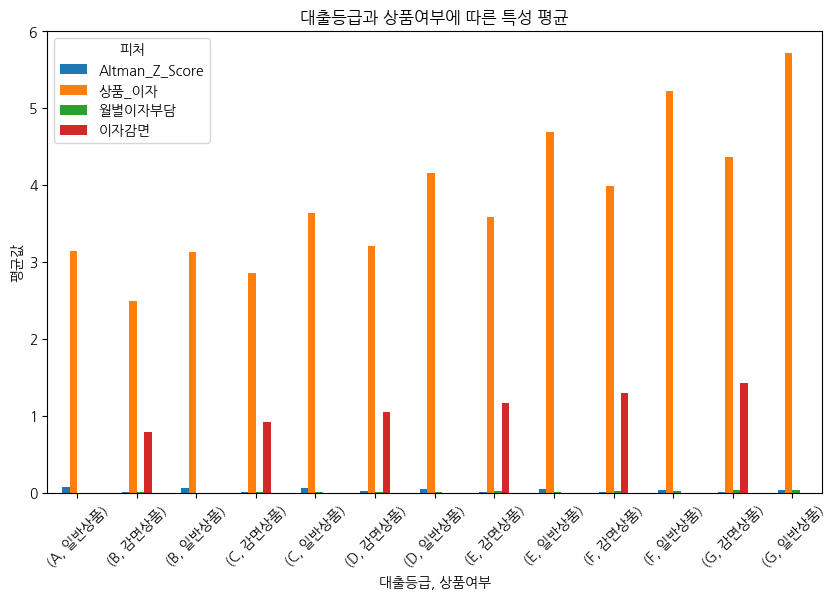

In [208]:
import matplotlib.pyplot as plt

# pivot_table을 생성
pivot_table = loan_product_data.pivot_table(index=['대출등급_', '상품여부'], values=['월별이자부담', 'Altman_Z_Score', '상품_이자', '이자감면'], aggfunc='mean')

# 그래프 그리기
pivot_table.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('대출등급과 상품여부에 따른 특성 평균')
plt.xlabel('대출등급, 상품여부')
plt.ylabel('평균값')
plt.legend(title='피처')
plt.show()


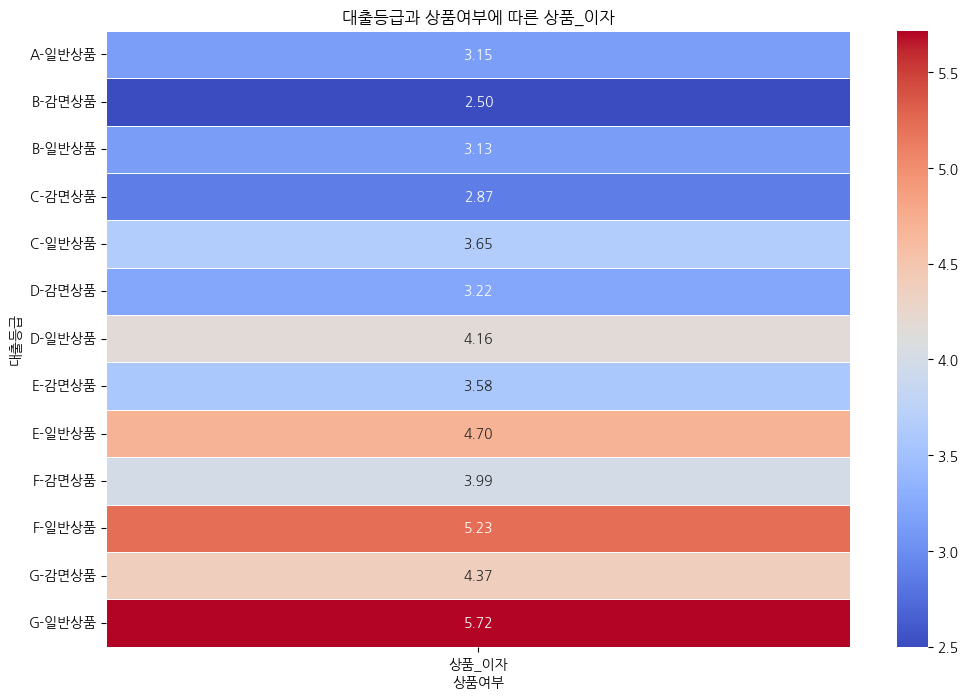

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot_table을 생성
pivot_table_interest = loan_product_data.pivot_table(index=['대출등급_', '상품여부'], values='상품_이자', aggfunc='mean')

# 그래프 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_interest, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('대출등급과 상품여부에 따른 상품_이자')
plt.xlabel('상품여부')
plt.ylabel('대출등급')
plt.show()


In [200]:
filtered_data = loan_product_data[loan_product_data['상품여부'] == '감면상품']

filtered_data['대출등급_'].value_counts(normalize=True).sort_index()

대출등급_
B    0.001242
C    0.029183
D    0.444893
E    0.382800
F    0.117355
G    0.024527
Name: proportion, dtype: float64

In [203]:
loan_product_data[['Altman_Z_Score','월별이자부담','대출금액']].corr()

,Altman_Z_Score,월별이자부담,대출금액
Altman_Z_Score,1.000000,-0.160914,-0.107688
월별이자부담,-0.160914,1.000000,0.184545
대출금액,-0.107688,0.184545,1.000000


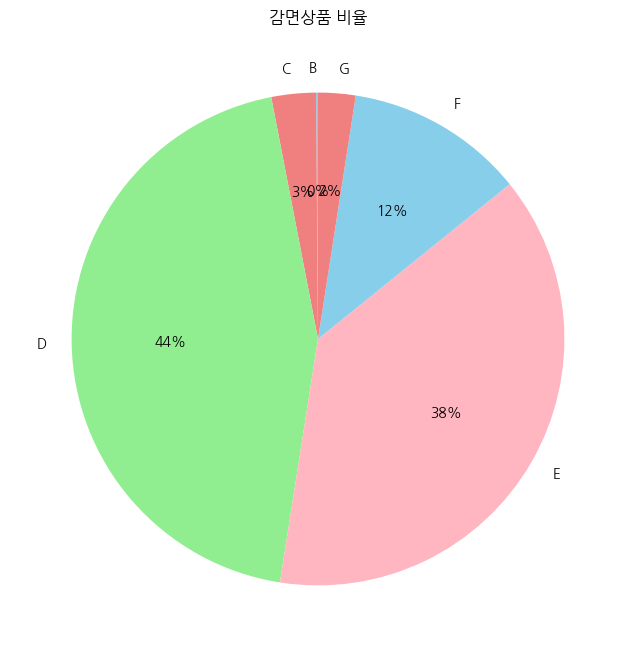

In [239]:
import matplotlib.pyplot as plt

# Value counts for '대출등급_'
value_counts = filtered_data['대출등급_'].value_counts(normalize=True).sort_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', startangle=90, labeldistance=1.1, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('감면상품 비율')
plt.show()


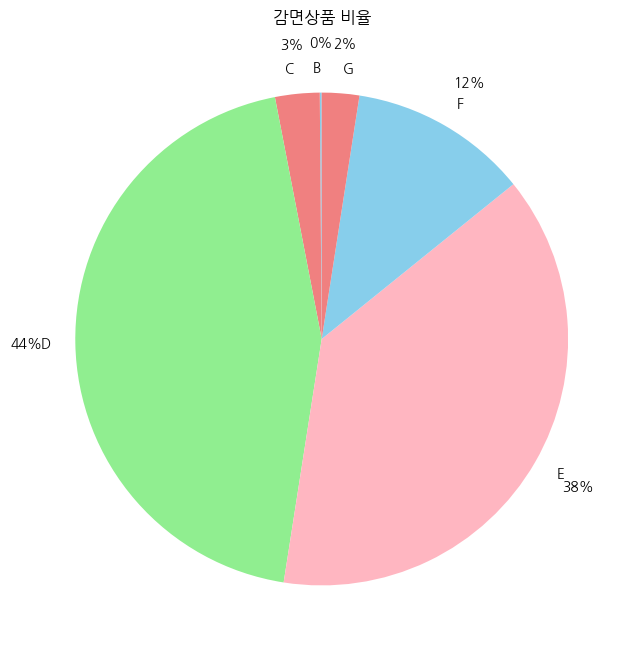

In [250]:
import matplotlib.pyplot as plt

# Value counts for '대출등급_'
value_counts = filtered_data['대출등급_'].value_counts(normalize=True).sort_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.0f%%', startangle=90, labeldistance=1.1, pctdistance=1.2, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('감면상품 비율')
plt.show()


In [282]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

train_scaled = scaler.fit_transform(train_ft)
test_scaled = scaler.transform(test_ft)

train_data = pd.DataFrame(train_scaled, columns = train_ft.columns)
test_data = pd.DataFrame(test_scaled, columns = test_ft.columns)

train_data.shape,test_data.shape

((96294, 74), (64197, 74))

In [283]:
# 정답 데이터
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([2, 1, 0, ..., 0, 3, 2])

In [284]:
SEED=42
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=SEED)

In [285]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [286]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# LGBMClassifier
lgbm_model = LGBMClassifier(random_state=SEED, objective='multiclass', num_class=len(set(target)))

# CatBoostClassifier
cat_model = CatBoostClassifier(random_state=SEED, loss_function='MultiClass', classes_count=len(set(target)))

# XGBClassifier
xgb_model = XGBClassifier(random_state=SEED, objective='multi:softmax', num_class=len(set(target)))

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=SEED, n_estimators=100, criterion='gini', class_weight='balanced')


In [296]:
SEED =622

In [297]:
Best_Parameters={'n_estimators': 155, 'max_depth': 10, 'learning_rate': 0.03891426367263122, 'subsample': 0.9104345919006934, 'colsample_bytree': 0.7717453674190411, 'min_child_weight': 1}

In [298]:
xgb_model=XGBClassifier(**Best_Parameters,random_state=SEED, objective="multi:softmax")

In [289]:
scores = cross_val_score(xgb_model, train_data, target, cv=cv, scoring='f1_macro', n_jobs=-1)
mean_f1_macro = np.mean(scores)
mean_f1_macro

0.9288596124329915

In [299]:
LightGBM_Best_Parameters= {'n_estimators': 196, 'max_depth': 10, 'learning_rate': 0.022989933199300393, 'subsample': 0.9549318074007551, 'colsample_bytree': 0.733631469760139, 'min_child_weight': 2}

In [300]:
lgbm_model = LGBMClassifier(**LightGBM_Best_Parameters,random_state=SEED, objective='multiclass', num_class=len(set(target)))

In [301]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("lgbm", lgbm_model ),
    ("xgb", xgb_model ),
]
Vot_model = VotingClassifier(estimators, voting="soft", n_jobs=-1,verbose=0)

scores = cross_val_score(Vot_model, train_data, target, cv=cv, scoring="f1_macro", n_jobs=-1)
scores.mean()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, repl

0.9282301199330927

In [304]:
sample_sub = pd.read_csv("sample_submission.csv")

In [305]:
Vot_model.fit(train_data,target)

pred = Vot_model.predict(test_data)
pred

sample_sub["대출등급"] = le.inverse_transform(pred)
sample_sub
sample_sub.to_csv("DH_sub_00_union.csv",index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9281
[LightGBM] [Info] Number of data points in the train set: 96294, number of used features: 74
[LightGBM] [Info] Start training from score -1.747695
[LightGBM] [Info] Start training from score -1.206441
[LightGBM] [Info] Start training from score -1.248757
[LightGBM] [Info] Start training from score -1.975590
[LightGBM] [Info] Start training from score -2.572162
[LightGBM] [Info] Start training from score -3.897527
[LightGBM] [Info] Start training from score -5.